In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
from torch.utils.data.sampler import SubsetRandomSampler

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

100%|██████████| 26421880/26421880 [00:03<00:00, 8101475.59it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 144250.97it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2631588.74it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13062478.52it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


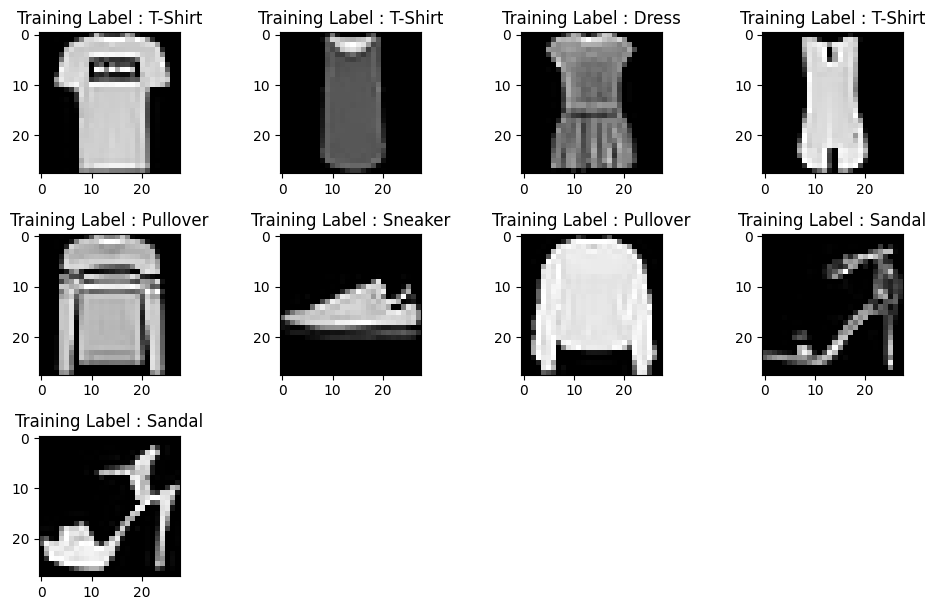

In [3]:
labels_map = ('T-Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle Boot')
fig = plt.figure(figsize=(10,10));
columns = 4;
rows = 5;
for i in range(1, 10):
    fig.add_subplot(rows, columns, i)
    fig.tight_layout()
    plt.imshow(trainset.train_data[i].numpy(), cmap='gray')
    plt.title('Training Label : %s' % labels_map[trainset.train_labels[i]])
plt.show()

In [4]:
!pip install d2l==0.17.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.2 MB/s eta 0:00:00


## Part a

In [5]:
input_size = 784
out_size = 10

In [14]:
## Define the model
################ Your code ############
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, 256),
    nn.ReLU(),
    nn.Linear(256, out_size)
)
#######################################

In [15]:
################ Your code ############
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
#######################################

In [16]:
print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)


In [17]:
## Train your model
epochs = 10

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:

    images = images.view(images.shape[0],-1)

    #reset the default gradients
    optimizer.zero_grad()

    # forward pass
    ################ Your code ############
    output = model(images)
    loss = criterion(output, labels)
    #######################################

    loss.backward()
    optimizer.step()

    running_loss = running_loss+loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.6906883086858273
Training loss: 0.47706854559465256
Training loss: 0.4346252785785112
Training loss: 0.4091472718824964
Training loss: 0.38897509018241216
Training loss: 0.3738068049428051
Training loss: 0.3608269055070145
Training loss: 0.3502158037921005
Training loss: 0.34052412738519183
Training loss: 0.3310425146016231


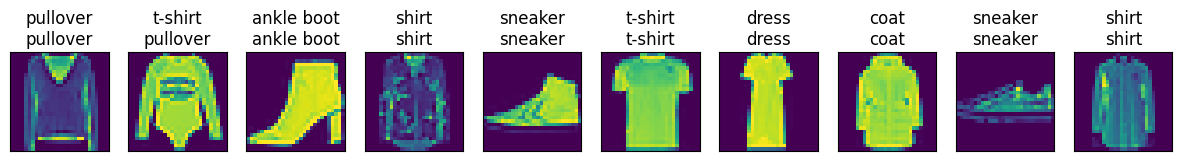

In [18]:
## Test your model
from d2l import torch as d2l
d2l.predict_ch3(model,testloader,n = 10)

## Part b

In [37]:
model_overfit = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, 1024),
    nn.LeakyReLU(),
    nn.Linear(1024, 256),
    nn.LeakyReLU(),
    nn.Linear(256, 128),
    nn.LeakyReLU(),
    nn.Linear(128, out_size)
)

In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_overfit.parameters(), lr=0.01)

In [39]:
print(model_overfit)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=1024, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
  (3): Linear(in_features=1024, out_features=256, bias=True)
  (4): LeakyReLU(negative_slope=0.01)
  (5): Linear(in_features=256, out_features=128, bias=True)
  (6): LeakyReLU(negative_slope=0.01)
  (7): Linear(in_features=128, out_features=10, bias=True)
)


In [40]:
epochs = 10
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for e in range(epochs):
    running_loss = 0
    correct = 0
    total = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()
        output = model_overfit(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = output.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss.append(running_loss / len(trainloader))
    train_accuracy.append(correct / total)

    test_running_loss = 0
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for images, labels in testloader:
            images = images.view(images.shape[0], -1)
            output = model_overfit(images)
            loss = criterion(output, labels)

            test_running_loss += loss.item()

            _, predicted = output.max(1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_loss.append(test_running_loss / len(testloader))
    test_accuracy.append(test_correct / test_total)

    print(f'Epoch [{e+1}/{epochs}], Train Loss: {train_loss[-1]:.4f}, Train Accuracy: {train_accuracy[-1]*100:.2f}%, Test Loss: {test_loss[-1]:.4f}, Test Accuracy: {test_accuracy[-1]*100:.2f}%')

Epoch [1/10], Train Loss: 1.0014, Train Accuracy: 67.50%, Test Loss: 0.6242, Test Accuracy: 77.79%
Epoch [2/10], Train Loss: 0.5280, Train Accuracy: 81.39%, Test Loss: 0.4943, Test Accuracy: 82.75%
Epoch [3/10], Train Loss: 0.4565, Train Accuracy: 83.92%, Test Loss: 0.5342, Test Accuracy: 79.42%
Epoch [4/10], Train Loss: 0.4149, Train Accuracy: 85.35%, Test Loss: 0.4269, Test Accuracy: 84.44%
Epoch [5/10], Train Loss: 0.3870, Train Accuracy: 86.32%, Test Loss: 0.4510, Test Accuracy: 83.37%
Epoch [6/10], Train Loss: 0.3656, Train Accuracy: 86.85%, Test Loss: 0.4100, Test Accuracy: 85.01%
Epoch [7/10], Train Loss: 0.3480, Train Accuracy: 87.45%, Test Loss: 0.4232, Test Accuracy: 84.49%
Epoch [8/10], Train Loss: 0.3341, Train Accuracy: 87.98%, Test Loss: 0.4058, Test Accuracy: 85.13%
Epoch [9/10], Train Loss: 0.3212, Train Accuracy: 88.35%, Test Loss: 0.3815, Test Accuracy: 86.22%
Epoch [10/10], Train Loss: 0.3102, Train Accuracy: 88.84%, Test Loss: 0.3721, Test Accuracy: 86.52%


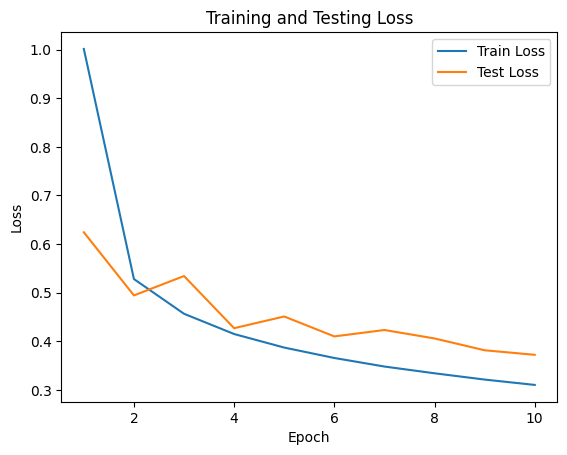

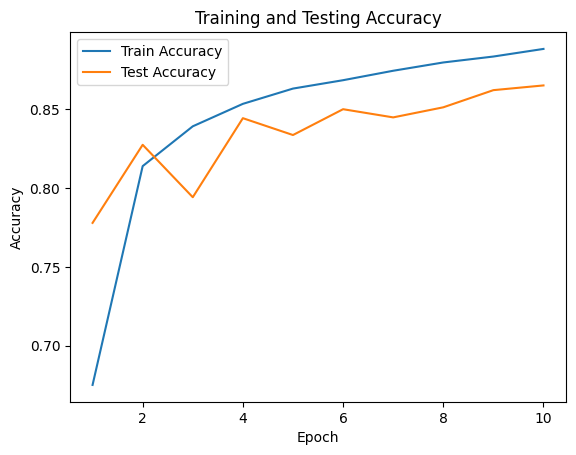

In [41]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1, epochs+1), train_loss, label='Train Loss')
plt.plot(range(1, epochs+1), test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, epochs+1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

## Part c

In [42]:
transform_augment = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [43]:
# Download and load training data
trainset = datasets.FashionMNIST('./data',download=True, train= True, transform=transform_augment)
trainloader_augment = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('./data',download=True, train= False, transform=transform_augment)
testloader_augment = torch.utils.data.DataLoader(testset, batch_size= 64, shuffle=True)

In [44]:
epochs = 10
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for e in range(epochs):
    running_loss = 0
    correct = 0
    total = 0
    for images, labels in trainloader_augment :
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()
        output = model_overfit(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = output.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss.append(running_loss / len(trainloader_augment ))
    train_accuracy.append(correct / total)

    test_running_loss = 0
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for images, labels in testloader_augment :
            images = images.view(images.shape[0], -1)
            output = model_overfit(images)
            loss = criterion(output, labels)

            test_running_loss += loss.item()

            _, predicted = output.max(1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_loss.append(test_running_loss / len(testloader_augment ))
    test_accuracy.append(test_correct / test_total)

    print(f'Epoch [{e+1}/{epochs}], Train Loss: {train_loss[-1]:.4f}, Train Accuracy: {train_accuracy[-1]*100:.2f}%, Test Loss: {test_loss[-1]:.4f}, Test Accuracy: {test_accuracy[-1]*100:.2f}%')

Epoch [1/10], Train Loss: 0.5330, Train Accuracy: 80.64%, Test Loss: 0.5113, Test Accuracy: 81.11%
Epoch [2/10], Train Loss: 0.4439, Train Accuracy: 83.72%, Test Loss: 0.4654, Test Accuracy: 83.06%
Epoch [3/10], Train Loss: 0.4189, Train Accuracy: 84.58%, Test Loss: 0.4822, Test Accuracy: 82.18%
Epoch [4/10], Train Loss: 0.4046, Train Accuracy: 85.18%, Test Loss: 0.4339, Test Accuracy: 84.49%
Epoch [5/10], Train Loss: 0.3952, Train Accuracy: 85.59%, Test Loss: 0.4247, Test Accuracy: 84.47%
Epoch [6/10], Train Loss: 0.3843, Train Accuracy: 85.97%, Test Loss: 0.4182, Test Accuracy: 84.69%
Epoch [7/10], Train Loss: 0.3727, Train Accuracy: 86.38%, Test Loss: 0.4466, Test Accuracy: 83.47%
Epoch [8/10], Train Loss: 0.3675, Train Accuracy: 86.52%, Test Loss: 0.4000, Test Accuracy: 85.68%
Epoch [9/10], Train Loss: 0.3609, Train Accuracy: 86.73%, Test Loss: 0.4028, Test Accuracy: 85.39%
Epoch [10/10], Train Loss: 0.3548, Train Accuracy: 86.96%, Test Loss: 0.4376, Test Accuracy: 83.56%


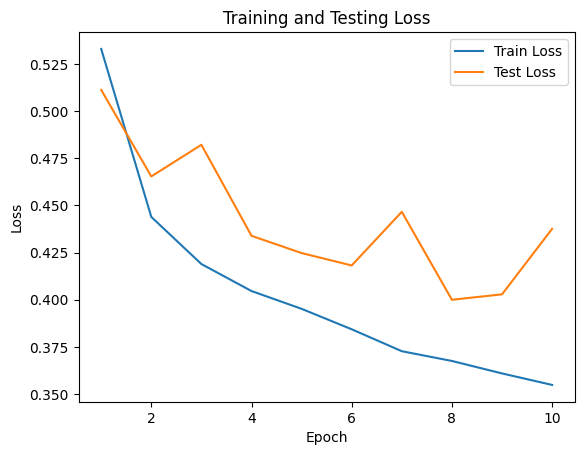

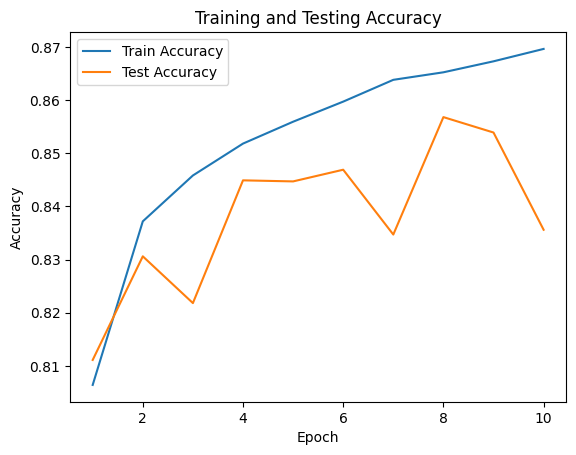

In [45]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1, epochs+1), train_loss, label='Train Loss')
plt.plot(range(1, epochs+1), test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, epochs+1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

<h2>Part D</h2>

In [46]:
model_l2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, 1024),
    nn.LeakyReLU(),
    nn.Linear(1024, 256),
    nn.LeakyReLU(),
    nn.Linear(256, 128),
    nn.LeakyReLU(),
    nn.Linear(128, out_size)
)

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_l2.parameters(), lr=0.01, weight_decay=0.001)

In [48]:
epochs = 10
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for e in range(epochs):
    running_loss = 0
    correct = 0
    total = 0
    for images, labels in trainloader :
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()
        output = model_l2(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = output.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss.append(running_loss / len(trainloader ))
    train_accuracy.append(correct / total)

    test_running_loss = 0
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for images, labels in testloader :
            images = images.view(images.shape[0], -1)
            output = model_l2(images)
            loss = criterion(output, labels)

            test_running_loss += loss.item()

            _, predicted = output.max(1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_loss.append(test_running_loss / len(testloader ))
    test_accuracy.append(test_correct / test_total)

    print(f'Epoch [{e+1}/{epochs}], Train Loss: {train_loss[-1]:.4f}, Train Accuracy: {train_accuracy[-1]*100:.2f}%, Test Loss: {test_loss[-1]:.4f}, Test Accuracy: {test_accuracy[-1]*100:.2f}%')

Epoch [1/10], Train Loss: 1.0242, Train Accuracy: 66.75%, Test Loss: 0.7150, Test Accuracy: 73.32%
Epoch [2/10], Train Loss: 0.5364, Train Accuracy: 80.91%, Test Loss: 0.5066, Test Accuracy: 81.97%
Epoch [3/10], Train Loss: 0.4622, Train Accuracy: 83.65%, Test Loss: 0.4927, Test Accuracy: 82.60%
Epoch [4/10], Train Loss: 0.4217, Train Accuracy: 85.07%, Test Loss: 0.4658, Test Accuracy: 82.97%
Epoch [5/10], Train Loss: 0.3963, Train Accuracy: 86.00%, Test Loss: 0.4384, Test Accuracy: 84.03%
Epoch [6/10], Train Loss: 0.3742, Train Accuracy: 86.73%, Test Loss: 0.4139, Test Accuracy: 85.27%
Epoch [7/10], Train Loss: 0.3573, Train Accuracy: 87.22%, Test Loss: 0.4219, Test Accuracy: 84.96%
Epoch [8/10], Train Loss: 0.3436, Train Accuracy: 87.71%, Test Loss: 0.4151, Test Accuracy: 84.86%
Epoch [9/10], Train Loss: 0.3301, Train Accuracy: 88.19%, Test Loss: 0.3663, Test Accuracy: 86.87%
Epoch [10/10], Train Loss: 0.3196, Train Accuracy: 88.47%, Test Loss: 0.3698, Test Accuracy: 86.56%


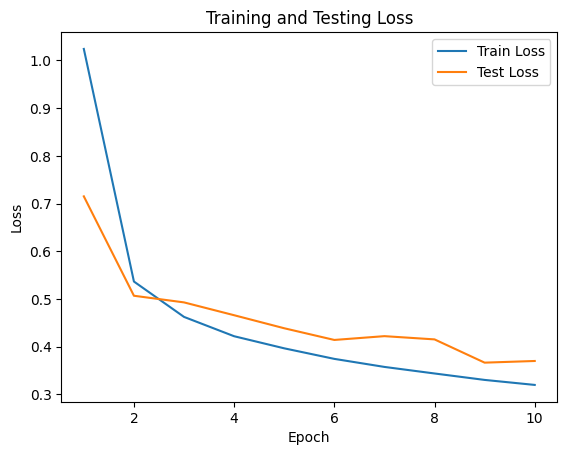

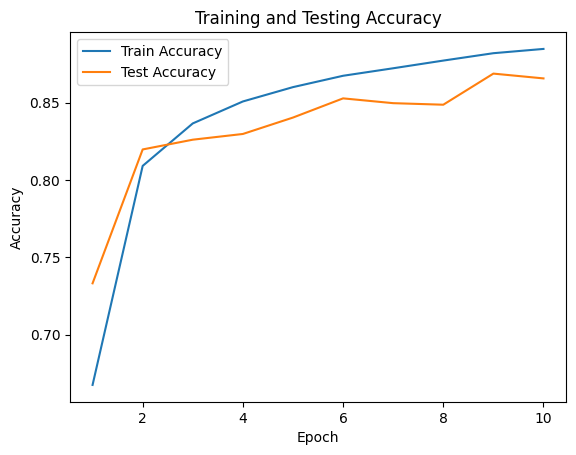

In [49]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1, epochs+1), train_loss, label='Train Loss')
plt.plot(range(1, epochs+1), test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, epochs+1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()

<h2>Part E</h2>

In [59]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, 1024),
    nn.LeakyReLU(),
    nn.Linear(1024, 256),
    nn.LeakyReLU(),
    nn.Dropout(0.5),
    nn.Linear(256, 128),
    nn.LeakyReLU(),
    nn.Dropout(0.5),
    nn.Linear(128, out_size)
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.001)

In [61]:
epochs = 10
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for e in range(epochs):
    running_loss = 0
    correct = 0
    total = 0
    for images, labels in trainloader_augment :
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = output.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss.append(running_loss / len(trainloader_augment  ))
    train_accuracy.append(correct / total)

    test_running_loss = 0
    test_correct = 0
    test_total = 0

    with torch.no_grad():
        for images, labels in testloader_augment :
            images = images.view(images.shape[0], -1)
            output = model(images)
            loss = criterion(output, labels)

            test_running_loss += loss.item()

            _, predicted = output.max(1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_loss.append(test_running_loss / len(testloader_augment ))
    test_accuracy.append(test_correct / test_total)

    print(f'Epoch [{e+1}/{epochs}], Train Loss: {train_loss[-1]:.4f}, Train Accuracy: {train_accuracy[-1]*100:.2f}%, Test Loss: {test_loss[-1]:.4f}, Test Accuracy: {test_accuracy[-1]*100:.2f}%')

Epoch [1/10], Train Loss: 0.8344, Train Accuracy: 70.32%, Test Loss: 0.7565, Test Accuracy: 72.62%
Epoch [2/10], Train Loss: 0.6891, Train Accuracy: 75.40%, Test Loss: 0.6748, Test Accuracy: 75.81%
Epoch [3/10], Train Loss: 0.6306, Train Accuracy: 77.50%, Test Loss: 0.6421, Test Accuracy: 77.09%
Epoch [4/10], Train Loss: 0.5979, Train Accuracy: 78.68%, Test Loss: 0.6055, Test Accuracy: 78.38%
Epoch [5/10], Train Loss: 0.5707, Train Accuracy: 79.72%, Test Loss: 0.6089, Test Accuracy: 77.98%
Epoch [6/10], Train Loss: 0.5537, Train Accuracy: 80.21%, Test Loss: 0.5901, Test Accuracy: 78.44%
Epoch [7/10], Train Loss: 0.5382, Train Accuracy: 80.86%, Test Loss: 0.5645, Test Accuracy: 79.86%
Epoch [8/10], Train Loss: 0.5243, Train Accuracy: 81.35%, Test Loss: 0.5511, Test Accuracy: 80.57%
Epoch [9/10], Train Loss: 0.5089, Train Accuracy: 82.17%, Test Loss: 0.5284, Test Accuracy: 81.18%
Epoch [10/10], Train Loss: 0.5035, Train Accuracy: 82.25%, Test Loss: 0.5420, Test Accuracy: 80.77%


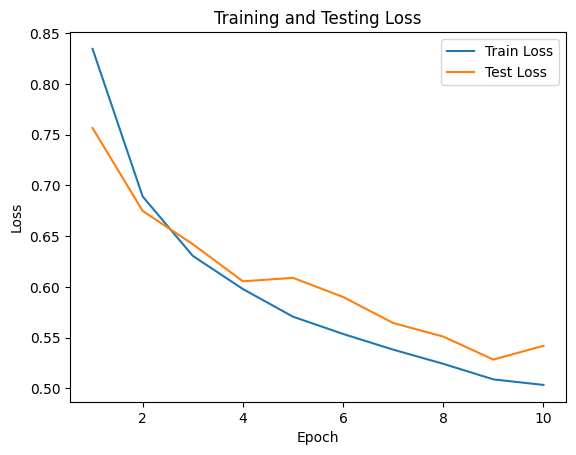

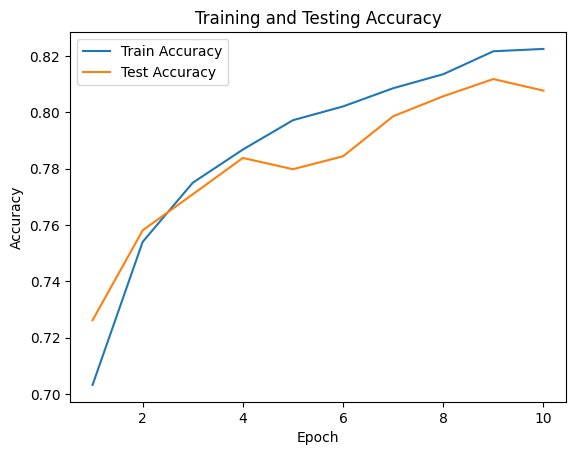

In [62]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1, epochs+1), train_loss, label='Train Loss')
plt.plot(range(1, epochs+1), test_loss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(range(1, epochs+1), train_accuracy, label='Train Accuracy')
plt.plot(range(1, epochs+1), test_accuracy, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()